# Problem 2: Classification

 An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

 
## 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree

In [2]:
# importing the Dataset

data_df=pd.read_csv('insurance_part2_data.csv')
data_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [3]:
data_df.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

In [4]:
data_df.shape

(3000, 10)

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [6]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [7]:
data_df.isna().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

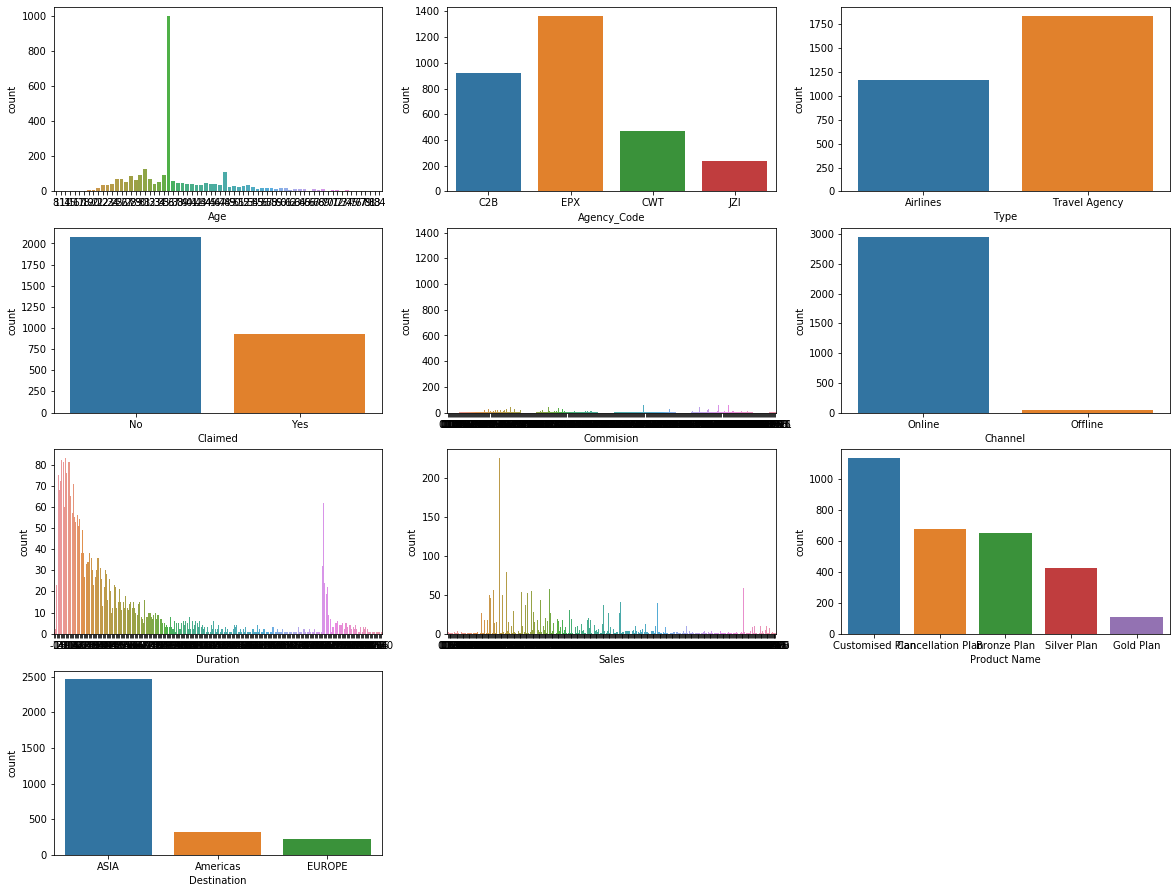

In [8]:
#  SUBPLOTS - FOR Loop
rowCnt = len(data_df.columns)
colCnt = 3
subCnt = 1

fig = plt.figure(figsize=(20,40))

for i in data_df.columns:
    plt.subplot(rowCnt, colCnt, subCnt)
    plt.xlabel(i, fontsize=10)
    sns.countplot(data_df[i])
    subCnt = subCnt + 1

In [9]:
#Converting Object column to categorical column

for column in data_df.columns:
    if data_df[column].dtype == 'object':
        data_df[column] = pd.Categorical(data_df[column]).codes
data_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


## 1.1 Read the data and do exploratory data analysis. Describe the data briefly.

## Univariate analysis

Checking the outliers in the dataset using the boxplot and checking the normality of the data using histogram

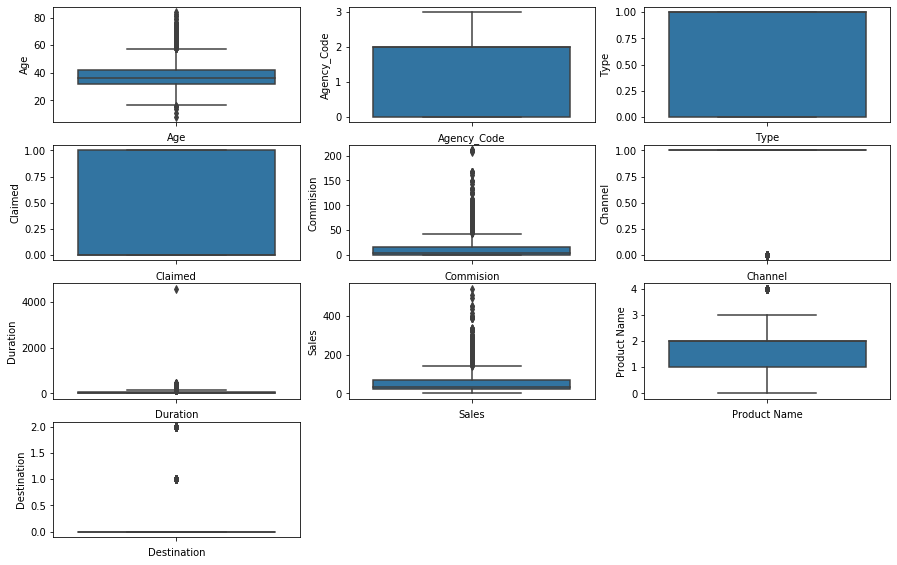

In [10]:
#  SUBPLOTS - FOR Loop
rowCnt = len(data_df.columns)
colCnt = 3
subCnt = 1

fig = plt.figure(figsize=(15,25))

for i in data_df.columns:
    plt.subplot(rowCnt, colCnt, subCnt)
    plt.xlabel(i, fontsize=10)
    sns.boxplot(data_df[i],orient='v')
    subCnt = subCnt + 1

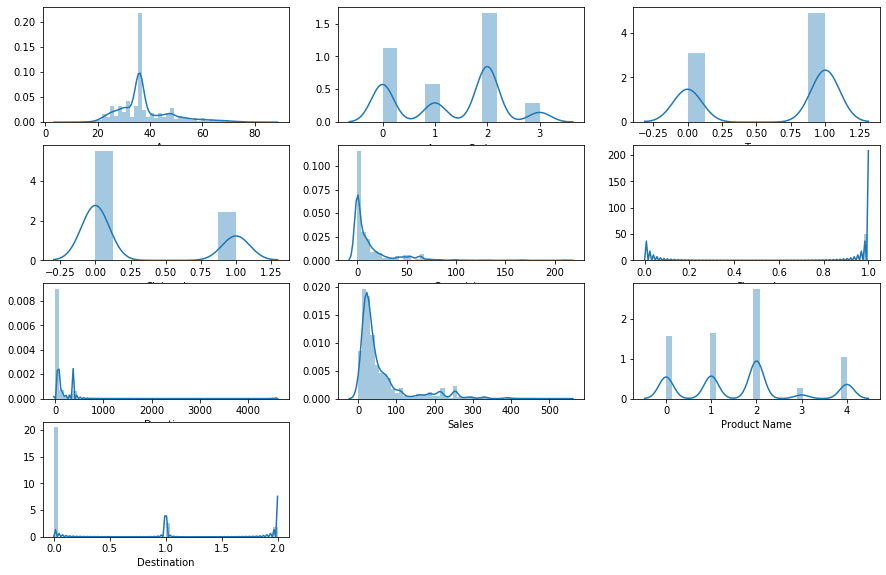

In [11]:
#  SUBPLOTS - FOR Loop
rowCnt = len(data_df.columns)
colCnt = 3
subCnt = 1

fig = plt.figure(figsize=(15,25))
for j in data_df.columns:
    plt.subplot(rowCnt, colCnt, subCnt)
    plt.xlabel(j, fontsize=10)
    sns.distplot(data_df[j])
    subCnt = subCnt + 1

## Multivariate analysis

Checking the correlation using the pairplot and heatmap

(10.0, 0.0)

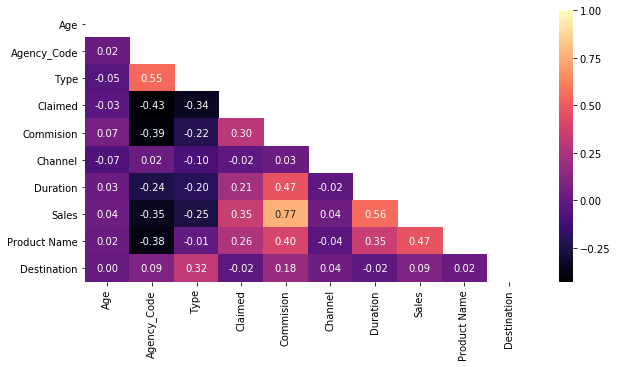

In [12]:
corr=data_df.corr(method='pearson')

# plot the correlation coefficients as a heatmap

plt.subplots(figsize=(10,5))
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
ax=sns.heatmap(data_df.corr(), annot=True,fmt='.2f',cmap='magma',mask=mask)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

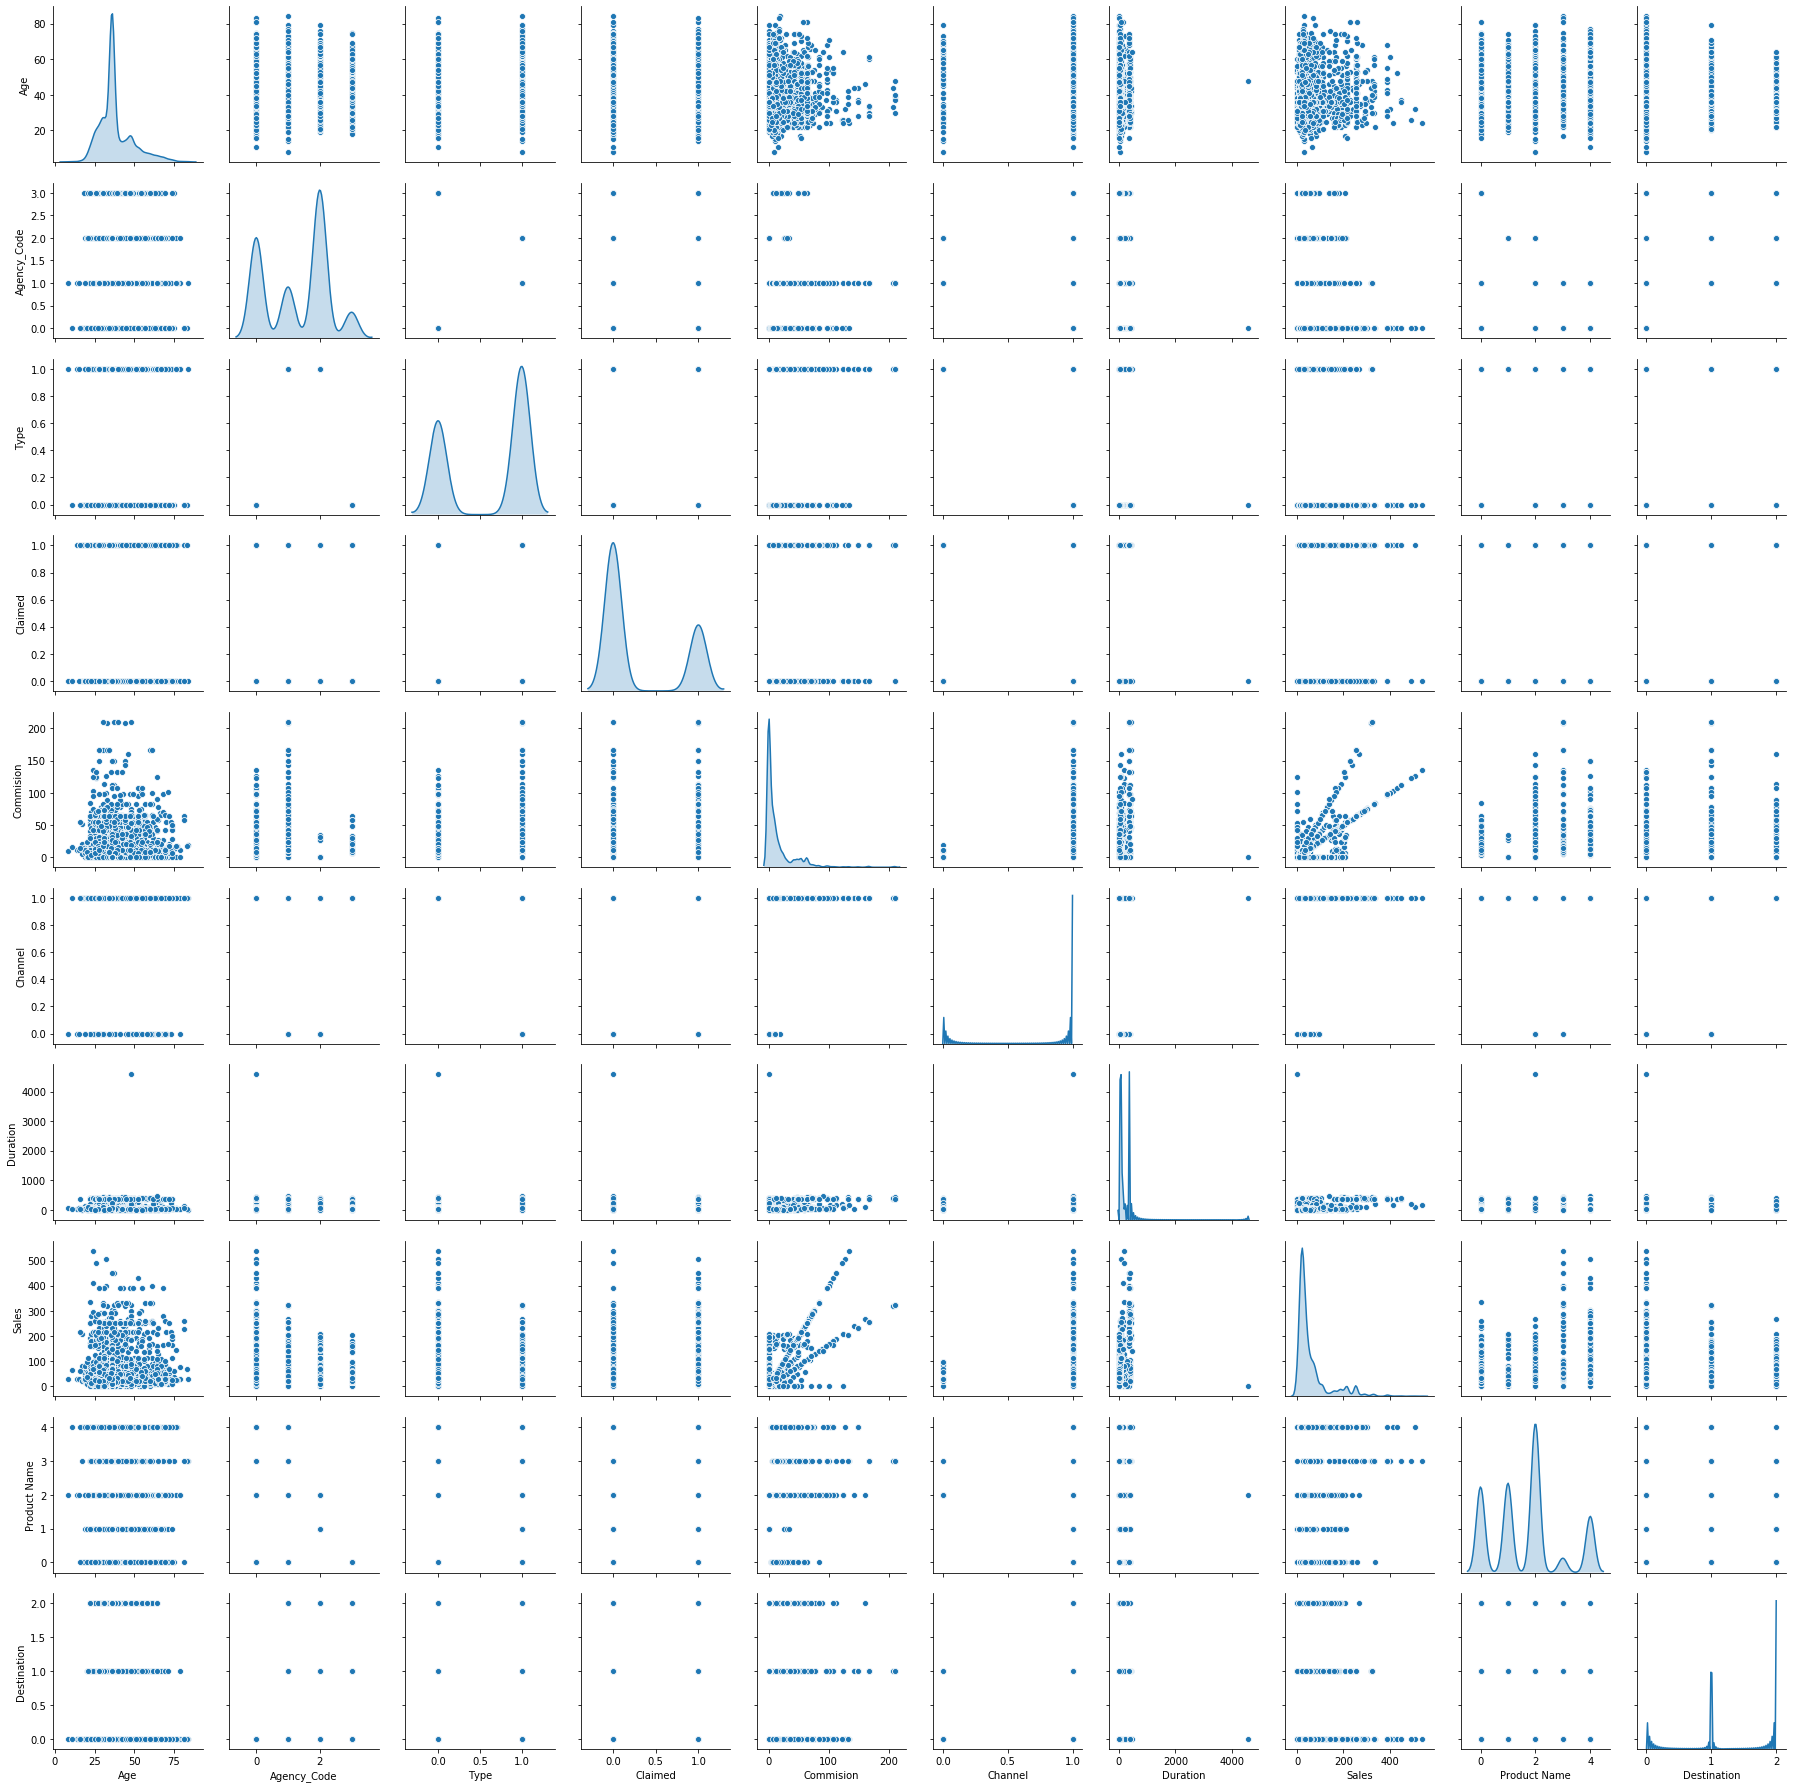

In [13]:
#Let us check for pair plots
sns.pairplot(data_df,diag_kind='kde')
plt.show()

In [14]:
data_df.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

In [15]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


cols=data_df[['Age','Commision', 'Channel', 'Duration', 'Sales',
       'Product Name', 'Destination']]

for col in cols:
    low,upp=remove_outlier(data_df[col])
    data_df[col]=np.where(data_df[col]<low,low,data_df[col])
    data_df[col]=np.where(data_df[col]>upp,upp,data_df[col])

In [1]:
#  SUBPLOTS - FOR Loop
rowCnt = len(data_df.columns)
colCnt = 4
subCnt = 1

fig = plt.figure(figsize=(15,25))

for i in data_df.columns:
    plt.subplot(rowCnt, colCnt, subCnt)
    plt.xlabel(i, fontsize=10)
    sns.boxplot(data_df[i],orient='v')
    subCnt = subCnt + 1

NameError: name 'data_df' is not defined

In [17]:
# Seperating INDEPENDENT AND DEPENDENT VARIABLE

X=data_df.drop('Claimed',axis=1)
y=data_df.iloc[:,3]

y.value_counts()

0    2076
1     924
Name: Claimed, dtype: int64

In [18]:
data_df

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.7000,1.0,7.0,2.51,2.0,0.0
1,36.0,2,1,0,0.0000,1.0,34.0,20.00,2.0,0.0
2,39.0,1,1,0,5.9400,1.0,3.0,9.90,2.0,0.0
3,36.0,2,1,0,0.0000,1.0,4.0,26.00,1.0,0.0
4,33.0,3,0,0,6.3000,1.0,53.0,18.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2995,28.0,1,1,1,43.0875,1.0,141.0,142.50,3.0,0.0
2996,35.0,0,0,0,13.5000,1.0,5.0,54.00,3.0,0.0
2997,36.0,2,1,0,0.0000,1.0,54.0,28.00,2.0,0.0
2998,34.0,0,0,1,7.6400,1.0,39.0,30.55,0.0,0.0


## 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [20]:
dt_model=DecisionTreeClassifier(criterion='gini', max_depth=9,
    min_samples_split=30,
    min_samples_leaf=75,random_state=0)

In [21]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=75, min_samples_split=30,
                       random_state=0)

In [22]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.634930
Sales         0.267313
Product Name  0.045842
Commision     0.026272
Duration      0.022005
Age           0.003638
Type          0.000000
Channel       0.000000
Destination   0.000000


In [23]:
y_predict=dt_model.predict(X_test)

##  Regularising the Decision Tree

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini'],
    'max_depth': [4,5,6,7,8],
    'min_samples_leaf': [28,29,30,31,32],
    'min_samples_split': [270,275,278,280,285,290,300]
}

In [25]:
reg_dt_model = DecisionTreeClassifier(random_state=0)

In [26]:
grid_search = GridSearchCV(estimator = reg_dt_model, param_grid = param_grid, cv = 20)

In [27]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini'], 'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_leaf': [28, 29, 30, 31, 32],
                         'min_samples_split': [270, 275, 278, 280, 285, 290,
                                               300]})

In [28]:
grid_search.best_params_
best_grid = grid_search.best_estimator_
best_grid

DecisionTreeClassifier(max_depth=5, min_samples_leaf=31, min_samples_split=278,
                       random_state=0)

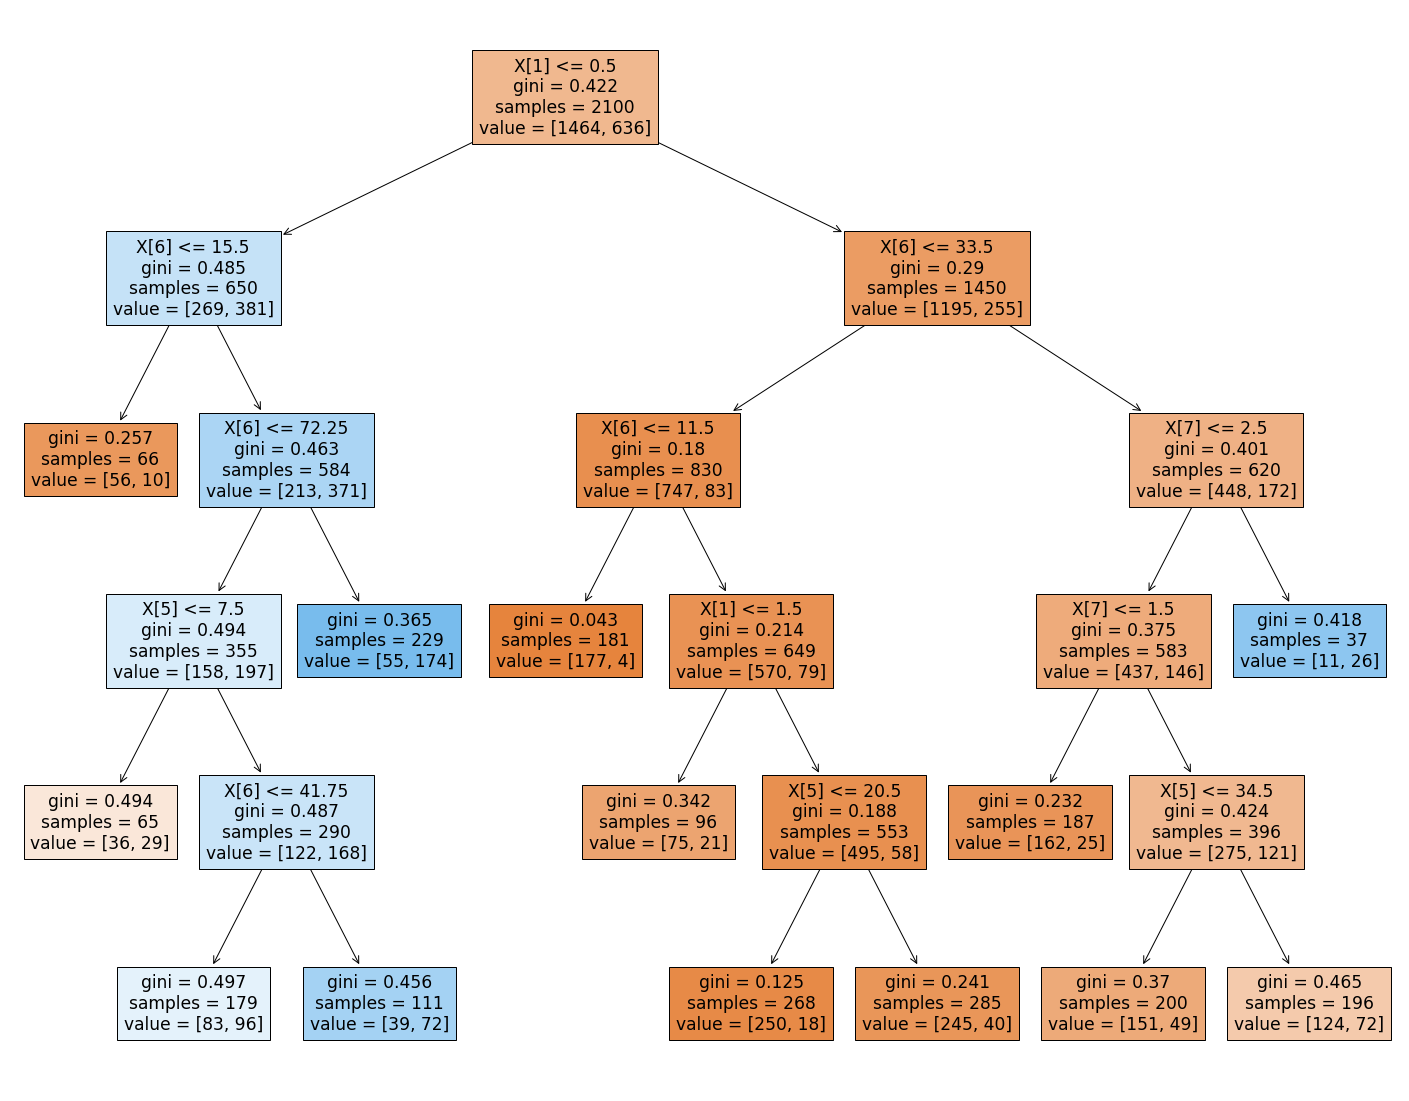

In [29]:
fig = plt.figure(figsize=(25,20))
dt_tree= tree.plot_tree(best_grid,filled=True)

In [30]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [31]:
print(classification_report(y_train,ytrain_predict))
print('\n')
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1464
           1       0.66      0.58      0.62       636

    accuracy                           0.78      2100
   macro avg       0.74      0.73      0.73      2100
weighted avg       0.78      0.78      0.78      2100



              precision    recall  f1-score   support

           0       0.82      0.90      0.86       612
           1       0.73      0.58      0.64       288

    accuracy                           0.80       900
   macro avg       0.77      0.74      0.75       900
weighted avg       0.79      0.80      0.79       900



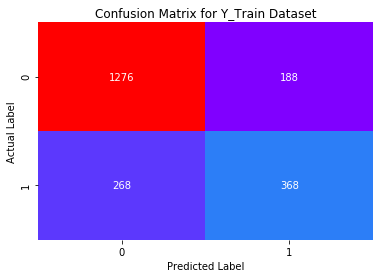

In [32]:
confusion_matrix(y_train,ytrain_predict)
ax=sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Y_Train Dataset')
plt.show()

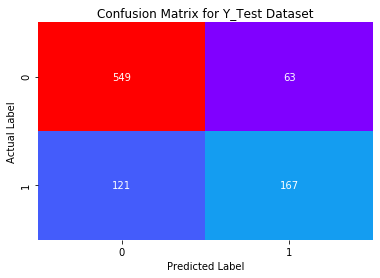

In [33]:
confusion_matrix(y_test,ytest_predict)
ax=sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Y_Test Dataset')
plt.show()

AUC: 0.816


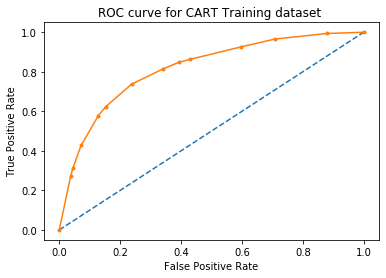

In [34]:
# AUC and ROC for the training data

# predict probabilities
probs = grid_search.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
cart_train_fpr, cart_train_tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr, marker='.')
plt.title('ROC curve for CART Training dataset ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC: 0.826


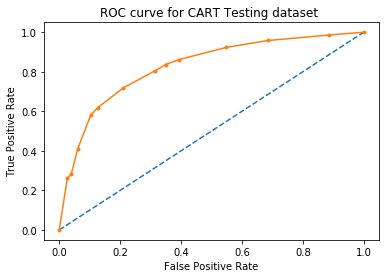

In [35]:
# AUC and ROC for the testing data

# predict probabilities
probs = grid_search.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
cart_test_fpr, cart_test_tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr, marker='.')
plt.title('ROC curve for CART Testing dataset ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

## Random Forest Classifier

In [36]:
X_train_int=X_train.astype(int)
X_train_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 1732 to 2732
Data columns (total 9 columns):
Age             2100 non-null int32
Agency_Code     2100 non-null int32
Type            2100 non-null int32
Commision       2100 non-null int32
Channel         2100 non-null int32
Duration        2100 non-null int32
Sales           2100 non-null int32
Product Name    2100 non-null int32
Destination     2100 non-null int32
dtypes: int32(9)
memory usage: 90.2 KB


In [40]:
y_train

1732    0
2440    1
1232    1
1081    0
2920    0
       ..
763     0
835     0
1653    0
2607    0
2732    0
Name: Claimed, Length: 2100, dtype: int8

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid_rfcl = {
    'max_depth': [5,6,7],#20,30,40
    'max_features': [0.85,0.95],## 7,8,9
    'min_samples_leaf': [9,11,12],## 50,100
    'min_samples_split': [46,50,55], ## 60,70
    'n_estimators': [350,400,450] ## 100,200
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

In [42]:
grid_search_rf.fit(X_train_int, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 6, 7], 'max_features': [0.85, 0.95],
                         'min_samples_leaf': [9, 11, 12],
                         'min_samples_split': [46, 50, 55],
                         'n_estimators': [350, 400, 450]})

In [43]:
grid_search_rf.best_params_

{'max_depth': 5,
 'max_features': 0.85,
 'min_samples_leaf': 9,
 'min_samples_split': 46,
 'n_estimators': 400}

In [45]:
best_grid_rf=grid_search_rf.best_estimator_

In [46]:
ytrain_predict=best_grid_rf.predict(X_train_int)
ytest_predict=best_grid_rf.predict(X_test)

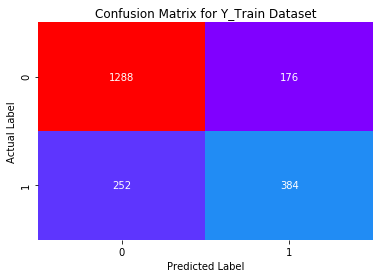

In [47]:
confusion_matrix(y_train,ytrain_predict)
ax=sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Y_Train Dataset')
plt.show()

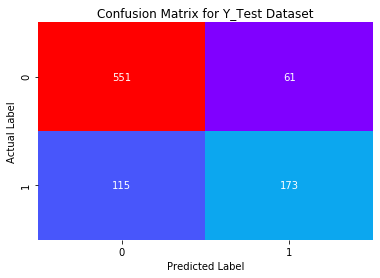

In [48]:
confusion_matrix(y_test,ytest_predict)
ax=sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Y_Test Dataset')
plt.show()

In [49]:
print(classification_report(y_train,ytrain_predict))
print('\n')
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1464
           1       0.69      0.60      0.64       636

    accuracy                           0.80      2100
   macro avg       0.76      0.74      0.75      2100
weighted avg       0.79      0.80      0.79      2100



              precision    recall  f1-score   support

           0       0.83      0.90      0.86       612
           1       0.74      0.60      0.66       288

    accuracy                           0.80       900
   macro avg       0.78      0.75      0.76       900
weighted avg       0.80      0.80      0.80       900



AUC: 0.841


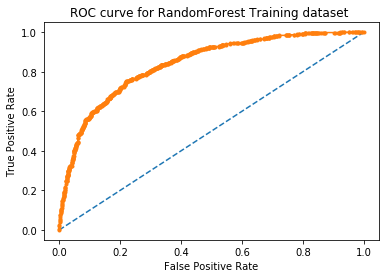

In [50]:
# AUC and ROC for the training data

# predict probabilities
probs = grid_search_rf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
rf_train_fpr, rf_train_tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr, marker='.')
plt.title('ROC curve for RandomForest Training dataset ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC: 0.842


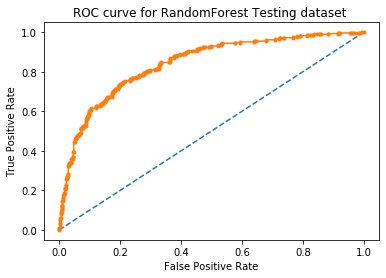

In [51]:
# AUC and ROC for the testing data

# predict probabilities
probs = grid_search_rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
rf_test_fpr, rf_test_tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr, marker='.')
plt.title('ROC curve for RandomForest Testing dataset ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

## MLP Classifier (Artificial Neural Network)

In [52]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [65]:
param_grid = {
    'hidden_layer_sizes': [100,200,(100,100)],
    'activation': ['relu'],
    'solver': ['adam'],
    'tol': [0.001,0.01],
    'max_iter' : [2000,3000,4000]
}

rfcl = MLPClassifier()

grid_search_a = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [66]:
grid_search_a.fit(X_trains, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [100, 200, (100, 100)],
                         'max_iter': [2000, 3000, 4000], 'solver': ['adam'],
                         'tol': [0.001, 0.01]})

In [67]:
grid_search_a.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100),
 'max_iter': 2000,
 'solver': 'adam',
 'tol': 0.01}

In [68]:
best_grid = grid_search_a.best_estimator_

In [69]:
ytrain_predict = best_grid.predict(X_trains)
ytest_predict = best_grid.predict(X_tests)

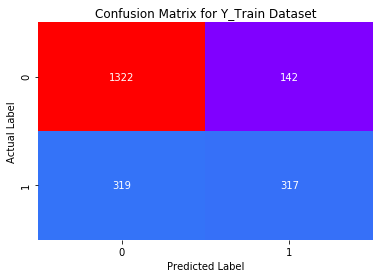

In [70]:
confusion_matrix(y_train,ytrain_predict)
ax=sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Y_Train Dataset')
plt.show()

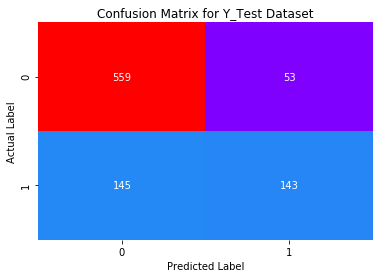

In [71]:
confusion_matrix(y_test,ytest_predict)
ax=sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Y_Test Dataset')
plt.show()

In [72]:
print(classification_report(y_train,ytrain_predict))
print('\n')
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1464
           1       0.69      0.50      0.58       636

    accuracy                           0.78      2100
   macro avg       0.75      0.70      0.72      2100
weighted avg       0.77      0.78      0.77      2100



              precision    recall  f1-score   support

           0       0.79      0.91      0.85       612
           1       0.73      0.50      0.59       288

    accuracy                           0.78       900
   macro avg       0.76      0.70      0.72       900
weighted avg       0.77      0.78      0.77       900



AUC: 0.820


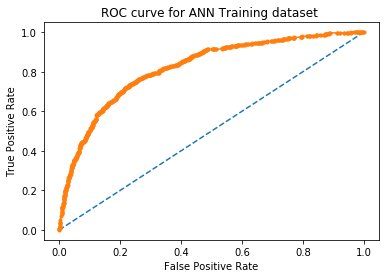

In [73]:
# AUC and ROC for the training data

# predict probabilities
probs = grid_search_a.predict_proba(X_trains)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
nn_train_fpr, nn_train_tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nn_train_fpr, nn_train_tpr, marker='.')
plt.title('ROC curve for ANN Training dataset ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC: 0.831


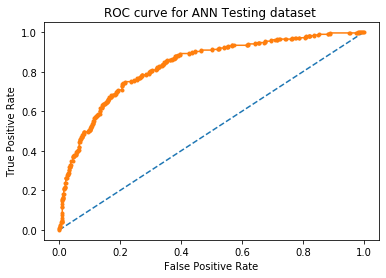

In [74]:
# AUC and ROC for the testing data

# predict probabilities
probs = grid_search_a.predict_proba(X_tests)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
nn_test_fpr, nn_test_tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nn_test_fpr, nn_test_tpr, marker='.')
plt.title('ROC curve for ANN Testing dataset ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

## Compare the model Accuracy,Precision,Recall,F1Score


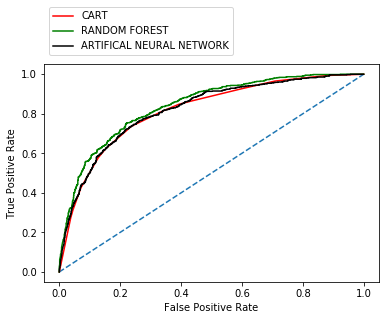

In [75]:
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr, color='red',label='CART')
plt.plot(rf_train_fpr, rf_train_tpr,color='green',label='RANDOM FOREST')
plt.plot(nn_train_fpr, nn_train_tpr, color='black',label='ARTIFICAL NEURAL NETWORK')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0.,1.02,1.0,0.102),loc='best')

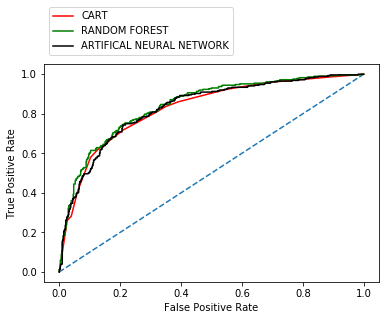

In [76]:
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label='CART')
plt.plot(rf_test_fpr, rf_test_tpr,color='green',label='RANDOM FOREST')
plt.plot(nn_test_fpr, nn_test_tpr, color='black',label='ARTIFICAL NEURAL NETWORK')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0.,1.02,1.0,0.102),loc='best')